In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
original_data = pd.read_csv("Iris.csv")

In [33]:
original_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [34]:
cleaned_data = original_data.copy()

In [35]:
cleaned_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [36]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


In [37]:
#不存在缺失值
#先检查缺失值，再看数据类型，在看重复数据，无效或错误数据

In [38]:
cleaned_data["Id"] = cleaned_data["Id"].astype("str")
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    object 
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), object(2)
memory usage: 4.8+ KB


In [39]:
cleaned_data["Id"].duplicated().sum()

0

In [40]:
cleaned_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

In [41]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [42]:
#把样本筛出来
iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
iris_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
len(iris_setosa)

50

In [44]:
iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
len(iris_versicolor)

50

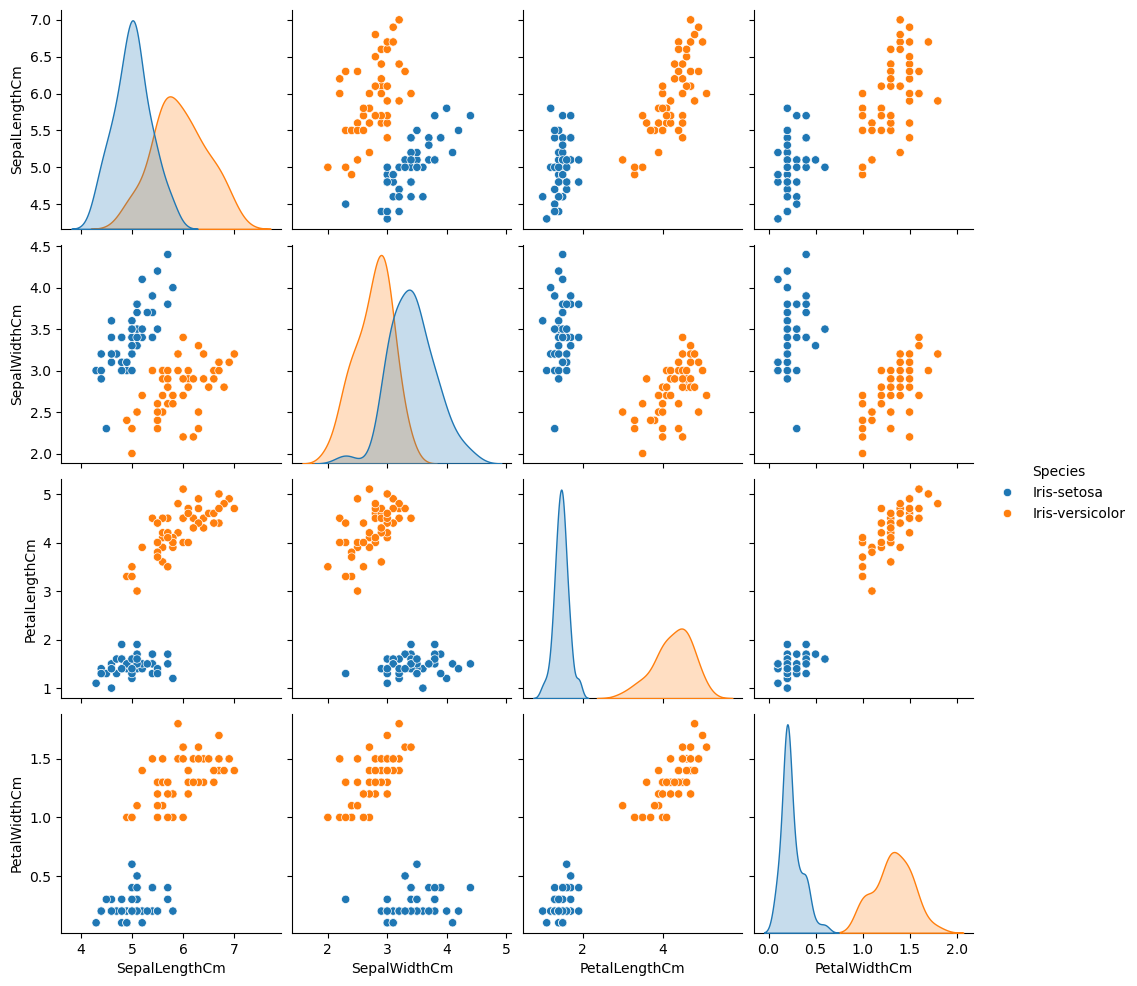

In [45]:
sns.pairplot(cleaned_data,hue="Species")

In [46]:
from scipy.stats import ttest_ind


<Axes: xlabel='SepalLengthCm', ylabel='Count'>

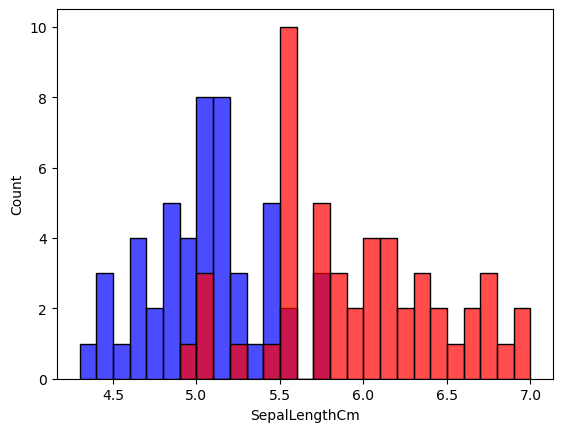

In [48]:
sns.histplot(iris_setosa["SepalLengthCm"],binwidth=0.1,alpha=0.7,color="b")
sns.histplot(iris_versicolor["SepalLengthCm"],binwidth=0.1,alpha=0.7,color="red")


In [49]:
t,p = ttest_ind(iris_setosa['SepalLengthCm'],iris_versicolor["SepalLengthCm"])
print(f't is {t}')
print(f'p is {p}')

t is -10.52098626754911
p is 8.985235037487079e-18


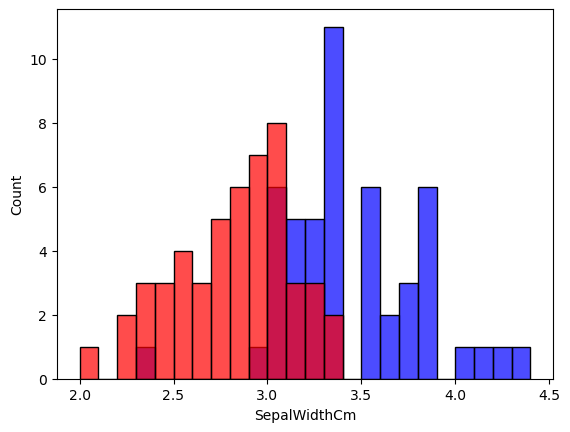

In [51]:
sns.histplot(iris_setosa['SepalWidthCm'], binwidth=0.1,alpha=0.7,color="b")
sns.histplot(iris_versicolor['SepalWidthCm'], binwidth=0.1,alpha=0.7,color="r")
plt.show()

In [53]:
t,p = ttest_ind(iris_setosa["SepalWidthCm"],iris_versicolor["SepalWidthCm"])
print(f't is {t}')
print(f'p is {p}')

t is 9.282772555558111
p is 4.362239016010215e-15


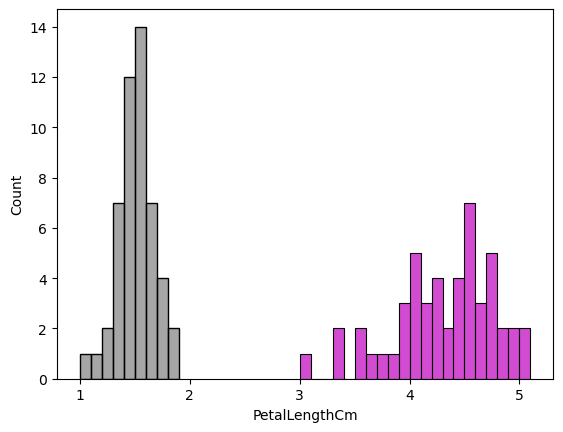

In [56]:
sns.histplot(iris_setosa['PetalLengthCm'], binwidth=0.1,alpha=0.7,color="grey")
sns.histplot(iris_versicolor['PetalLengthCm'], binwidth=0.1,alpha=0.7,color="m")
plt.show()

In [57]:
t_stat, p_value = ttest_ind(iris_setosa["PetalLengthCm"], iris_versicolor["PetalLengthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-39.46866259397272
p值：5.717463758170621e-62


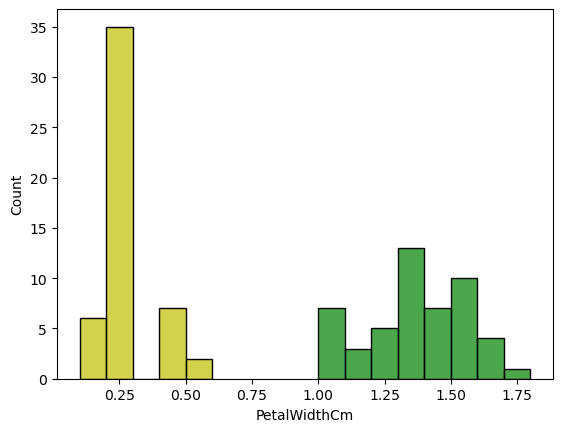

In [58]:
sns.histplot(iris_setosa['PetalWidthCm'], binwidth=0.1,alpha=0.7,color="y")
sns.histplot(iris_versicolor['PetalWidthCm'], binwidth=0.1,alpha=0.7,color="g")
plt.show()

In [59]:
t_stat, p_value = ttest_ind(iris_setosa["PetalWidthCm"], iris_versicolor["PetalWidthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-34.01237858829048
p值：4.589080615710866e-56
